## Decision Tree Classification
Adapted from http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

Plot the decision surface of a decision tree trained on pairs of features of the iris dataset.

In [2]:
using RandomForest
using PyPlot
using RDatasets:dataset

In [3]:
meshgrid(x,y) = (repmat(x',length(y),1),repmat(y,1,length(x)))

meshgrid (generic function with 1 method)

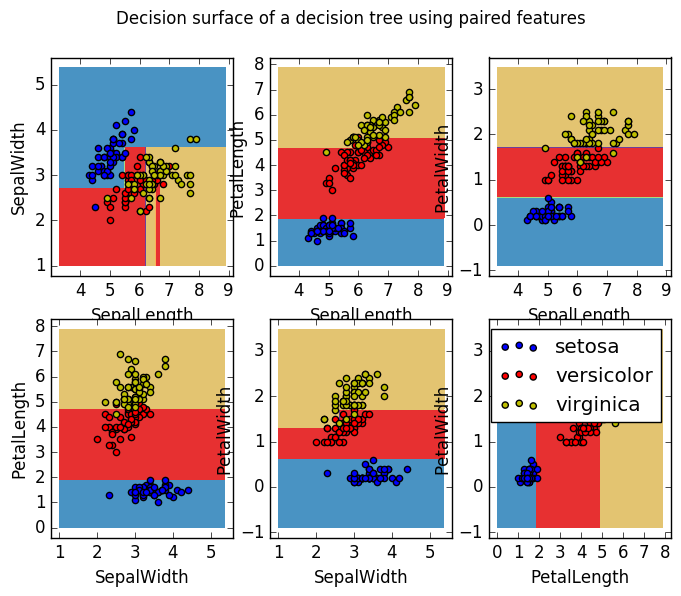

In [4]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = dataset("datasets", "iris")

target_names = unique(iris[:Species])

for (pairidx, pair) in enumerate([[1, 2], [1, 3], [1, 4],
                                [2, 3], [2, 4], [3, 4]])
    # We only take the two corresponding features
    X = convert(Array, iris[pair])
    y = convert(Array, iris[:Species])

    # Train
    tree_clf = treeClassifier()
    fit!(tree_clf, X, y)

    # Plot the decision boundary
    subplot(2, 3, pairidx)

    x_min, x_max = minimum(X[:, 1]) - 1, maximum(X[:, 1]) + 1
    y_min, y_max = minimum(X[:, 2]) - 1, maximum(X[:, 2]) + 1
    xx, yy = x_min:plot_step:x_max-plot_step,y_min:plot_step:y_max-plot_step
    grid_x, grid_y = meshgrid(xx,yy)
    data_to_test = hcat(vec(grid_x'),vec(grid_y'))
    Z = predict(tree_clf,data_to_test)
    map!(t->findfirst(target_names,t), Z)
    Z = reshape(Z, reverse(size(grid_x)))'
    cs = contourf(xx, yy, Z, cmap=ColorMap("Paired"))

    xlabel(names(iris)[pair[1]])
    ylabel(names(iris)[pair[2]])
    axis("tight")

    # Plot the training points
    for i in zip(1:n_classes, color for color in plot_colors)
        idx = find(target->target == target_names[i[1]],y)
        scatter(X[idx, 1], X[idx, 2], c="$(i[2])", label=target_names[i[1]], cmap=ColorMap("Paired"))
    end
    axis("tight")
end
suptitle("Decision surface of a decision tree using paired features")
legend()
show()